## Compare percentile changes for o2 and o2sat

In [1]:
import xarray as xr
import cftime
from xhistogram.xarray import histogram
import numpy as np
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import oceans.sw_extras.sw_extras as swe

from tracerpercentile import *

In [2]:
dataset = 'gobai' # gobai, esm4, ...
if dataset=='gobai':
    rootdir = '/projects/SOCCOM/datasets/gobai-o2/'
    filename = 'GOBAI-O2-v1.0_processed.zarr'
    ds = xr.open_zarr(rootdir+filename)
    grid = xr.open_dataset(rootdir+'regular_grid.nc')
    ds['volcello']=grid['rC']*grid['dp']
    
    ds['o2'] = ds['oxy'].copy()
    ds['o2sat'] = xr.apply_ufunc(swe.o2sol_SP_pt_benson_krause_84,
                                 ds['sal'],ds['temp'],dask='parallelized')
    tracer_bins = np.linspace(0,400,400)
    
elif dataset=='esm4':
    config_id = 'ESM4_historical_D1'
    ds_datadir = '/work/gam/projects/oxygen/data/'
    ds_filename = 'ds.'+config_id+'.zarr'
    ds = xr.open_zarr(ds_datadir+ds_filename)
    
    tracer_bins = np.linspace(0,0.4,400)

In [3]:
ascending=False
volume = ds['volcello']
percentiles = np.linspace(1,100,100)

In [4]:
# o2
print('o2')
tracer = ds['o2']
o2p,VT = calc_tracerpercentile(tracer = tracer,
                              volume = volume,
                              tracer_bins=tracer_bins,
                              percentiles=percentiles,
                              ascending=ascending,
                              verbose=True)
O2p = calc_extensive(o2p,VT.mean('time'))

# o2sat
print('o2sat')
tracer = ds['o2sat']
o2satp,VT = calc_tracerpercentile(tracer = tracer,
                              volume = volume,
                              tracer_bins=tracer_bins,
                              percentiles=percentiles,
                              ascending=ascending,
                              verbose=True)
O2satp = calc_extensive(o2satp,VT.mean('time'))

o2
Computing volumetric histogram.
[########################################] | 100% Completed | 27.74 s
Inverting for tracer percentile at each time.
time index : 0/216
time index : 10/216
time index : 20/216
time index : 30/216
time index : 40/216
time index : 50/216
time index : 60/216
time index : 70/216
time index : 80/216
time index : 90/216
time index : 100/216
time index : 110/216
time index : 120/216
time index : 130/216
time index : 140/216
time index : 150/216
time index : 160/216
time index : 170/216
time index : 180/216
time index : 190/216
time index : 200/216
time index : 210/216
o2sat
Computing volumetric histogram.
[########################################] | 100% Completed | 90.77 s
Inverting for tracer percentile at each time.
time index : 0/216
time index : 10/216
time index : 20/216
time index : 30/216
time index : 40/216
time index : 50/216
time index : 60/216
time index : 70/216
time index : 80/216
time index : 90/216
time index : 100/216
time index : 110/216
tim

In [5]:
with ProgressBar():
    O2p.load()
    O2satp.load()

[########################################] | 100% Completed | 27.64 s
[########################################] | 100% Completed | 83.86 s


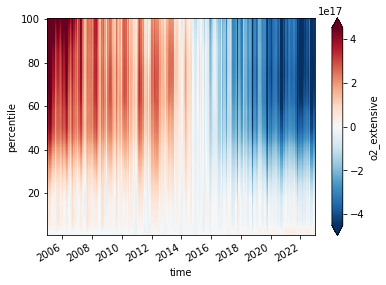

In [6]:
(O2p-O2p.mean('time')).plot(robust=True)

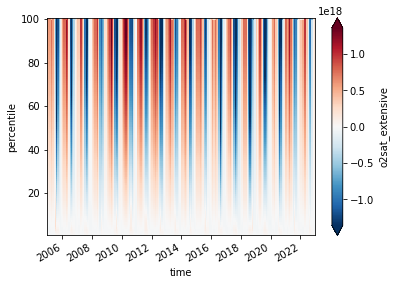

In [7]:
(O2satp-O2satp.mean('time')).plot(robust=True)

In [8]:
t1 = ['2005','2010']
t2 = ['2015','2019']
t1slice = slice(t1[0]+'-01-01',t1[1]+'-12-31')
t2slice = slice(t2[0]+'-01-01',t2[1]+'-12-31')
t1label = t1[0]+' to '+t1[1]
t2label = t2[0]+' to '+t2[1]
t1color='tab:blue'
t2color='tab:orange'
dt = cftime.datetime(int(t2[1]),12,31)-cftime.datetime(int(t1[1]),12,31)
dt = dt.days*24*60*60

In [9]:
O2p_t1 = O2p.sel(time=t1slice).mean('time')
O2p_t2 = O2p.sel(time=t2slice).mean('time')
O2satp_t1 = O2satp.sel(time=t1slice).mean('time')
O2satp_t2 = O2satp.sel(time=t2slice).mean('time')

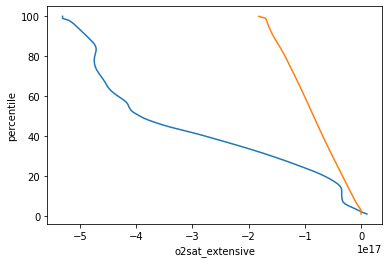

In [10]:
(O2p_t2-O2p_t1).plot(y='percentile')
(O2satp_t2-O2satp_t1).plot(y='percentile')